## Example 1:   Reading and displaying an image  

Contents:
How to read and display a FITS file.  
Also in this tutorial: rotating images, histograms, obtaining slices, ... 

<pre>
Máster en Astrofísica UCM  -- Técnicas Experimentales en Astrofísica  
Jaime Zamorano and Nicolás Cardiel

This notebook has reproduced parts of the STAK project notebooks:

  - https://stak-notebooks.readthedocs.io/en/latest/index.html
  - https://readthedocs.org/projects/stak-notebooks/downloads/pdf/latest/
and the astropy tutorials: http://learn.astropy.org/FITS-images.html (by Lia R. Corrales)

Version 2.0 2020/05/06  
Version 3.0 2021/01/10  almost ready for 2020/21
</pre>

Note that the ``astropy`` package should be installed. In this sense, have a look to the
astropy installation description: https://docs.astropy.org/en/stable/install.html.

In [56]:
from astropy.io import fits
from pylab import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as ml
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [93]:
# Some parameters for nicer graphs
matplotlib.rcParams['text.usetex']=False
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']
rcParams['font.size'] = 12.
rcParams['lines.linewidth'] = 4.
rcParams['axes.labelsize'] = 'large'
rcParams['grid.linewidth'] = 1.0
rcParams['grid.linestyle'] = ':'

### Opening FITS files and loading the image data

In [94]:
directory = './FITS_files/'
filename  = 'ucmP_0054.fits'
M51_file = directory + filename

Below we will open the FITS file. You can open the file in various modes, for this example we will open in update mode. The default mode is read only.

In [95]:
# Open the FITS file with Astropy
# using the default readonly mode
HDUList_object = fits.open(M51_file)

Next we will show the info print out for this HDUList object using the ``info()`` method.

In [96]:
# HDUList info call
HDUList_object.info()

Filename: ./FITS_files/ucmP_0054.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     208   (1301, 1301)   int16 (rescales to uint16)   


Now we will extract the primary header into the variable ``primary_header``. Note that since the index sequence that identifies a particular extension number starts at zero, the first extension is number 0. The ``primary_header`` object works as a Python dictionary, i.e., you can access any FITS keyword by its keyname (in this case the use of uppercase or lowercase characters is not relevant).

In [97]:
# Extract primary header
primary_header = HDUList_object[0].header

# Index header object with keyword name and print value
print(primary_header['FILENAME'])

ucmP_0054.fits


In [98]:
print(primary_header['EXPTIME'])

200.0


Let browse the whole header contents (iterating through the different keywords):

In [99]:
for key in primary_header:
    print('{:8} = {}'.format(key, primary_header[key]))

SIMPLE   = True
BITPIX   = 16
NAXIS    = 2
NAXIS1   = 1301
NAXIS2   = 1301
COMMENT  =   FITS (Flexible Image Transport System) format is defined in 'Astronomy
  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
Filtro R-Cousins
Filtro R-Cousins
COMMENT  =   FITS (Flexible Image Transport System) format is defined in 'Astronomy
  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
Filtro R-Cousins
Filtro R-Cousins
COMMENT  =   FITS (Flexible Image Transport System) format is defined in 'Astronomy
  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
Filtro R-Cousins
Filtro R-Cousins
BLOCKED  = True
BZERO    = 32768.0
BSCALE   = 1.0
BLANK    = 32768
DATAMAX  = 0.0
DATAMIN  = 0.0
DATAMEAN = 0.0
INSTRUME = CAFOS 2.2
TELESCOP = CA-2.2
OBJECT   = M51
OBSERVER = Practicas UCM -- grupo3
ORIGIN   = CAHA
FILENAME = ucmP_0054.fits
EXPTIME  = 200.0
DARKTIME = 0.0
RA       = 202.691942
DEC      = 47.11902
HA       = 12.781517
AIRMASS  = 1.0291

Next we extract the image data into a variable called ``image_data``.

In [100]:
# Extract image data
image_data = HDUList_object[0].data
print(image_data)

[[51247 52121 48378 ... 13568 13474 13622]
 [   13   383   752 ...   686   678   668]
 [    6   395   747 ...   673   667   673]
 ...
 [   26   403   762 ...   668   674   684]
 [   13   389   769 ...   672   674   670]
 [   19   397   751 ...  1657  1663  1646]]


You data is now stored as a 2-D numpy array. 

Want to know the dimensions of the image? Just look at the shape of the array.

In [101]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(1301, 1301)


At this point, we can just close the FITS file. 
We have stored everything we wanted to a variable.

In [102]:
HDUList_object.close()

If you don't need to examine the FITS header, you can call ``fits.getdata`` to bypass the previous steps.

In [103]:
image_data = fits.getdata(M51_file)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(1301, 1301)


### Viewing the image data and getting basic statistics

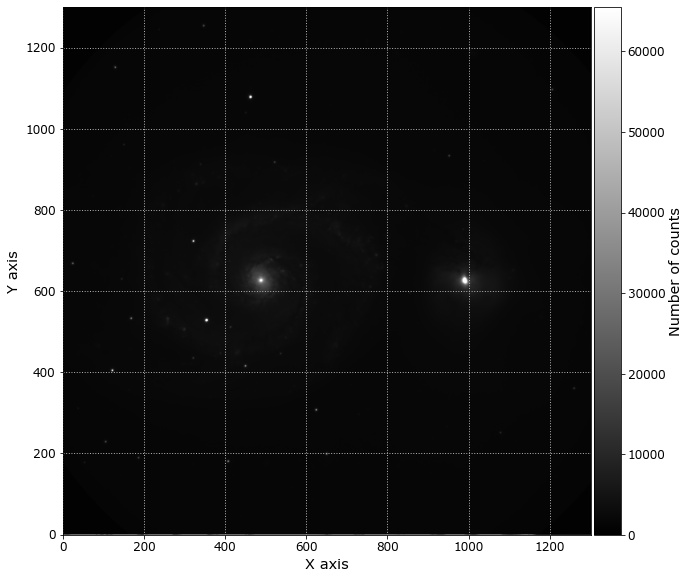

In [104]:
naxis2, naxis1 = image_data.shape

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
img = ax.imshow(image_data, cmap='gray', origin='low')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(img, cax=cax, label='Number of counts')
ax.grid()

Let us get some basic statistics about our image

In [105]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 0
Max: 65535
Mean: 2197.5481226821917
Stdev: 2056.216228065219


### Plotting a histogram

To make a histogram with ``matplotlib.pyplot.hist()``, we need to cast the data from a 2-D array into a 1-D array. In this case, we are using the ``ndarray.flatten()`` to return the 1-D numpy array.

In [106]:
print(image_data.shape)
print(type(image_data.flatten()))
print(image_data.flatten().shape)

(1301, 1301)
<class 'numpy.ndarray'>
(1692601,)


Text(0.5, 1.0, 'Image: ucmP_0054.fits')

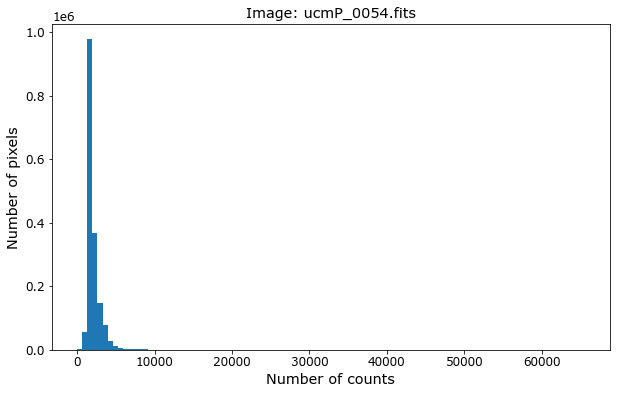

In [107]:
NBINS = 100
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 6))
histogram = ax.hist(image_data.flatten(), NBINS)
ax.set_xlabel('Number of counts')
ax.set_ylabel('Number of pixels')
ax.set_title('Image: {}'.format(filename))
#ax.set_title('Image: ' + filename)

The histogram shows that most of the pixels values are below 10000.
Let us plot the histogram with better detail.

Text(0.5, 0.98, 'Image: ./FITS_files/ucmP_0054.fits')

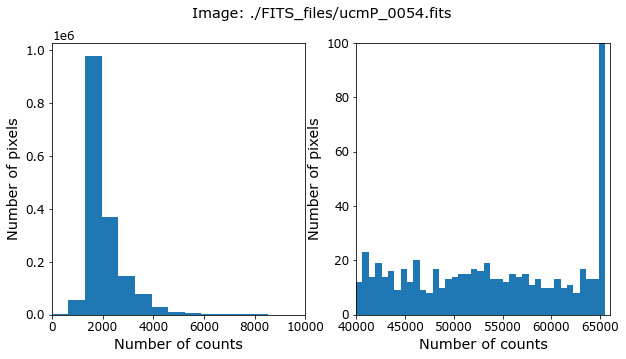

In [108]:
# Note that axarray will be an array (with two values, one for each histogram)
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

for i in range(2):
    ax = axarr[i]
    
    if i == 0:
        ax.set_xlim([0, 10000])
    else:
        ax.set_xlim([40000, 66000])
        ax.set_ylim([0, 100])
    ax.set_xlabel('Number of counts')
    ax.set_ylabel('Number of pixels')
                     
    h = ax.hist(image_data.flatten(), NBINS)

plt.suptitle('Image: {}'.format(M51_file))

It is evident that there are a few saturated pixels (values over $2^{16}-1 = 65535$ counts), and also pixels with values above $50000$ counts that are probably out of the linear regime of the CCD. 

We can display the image with a better looking aspect adding ``vmin`` and ``vmax`` parameters to the ``imshow()`` function.

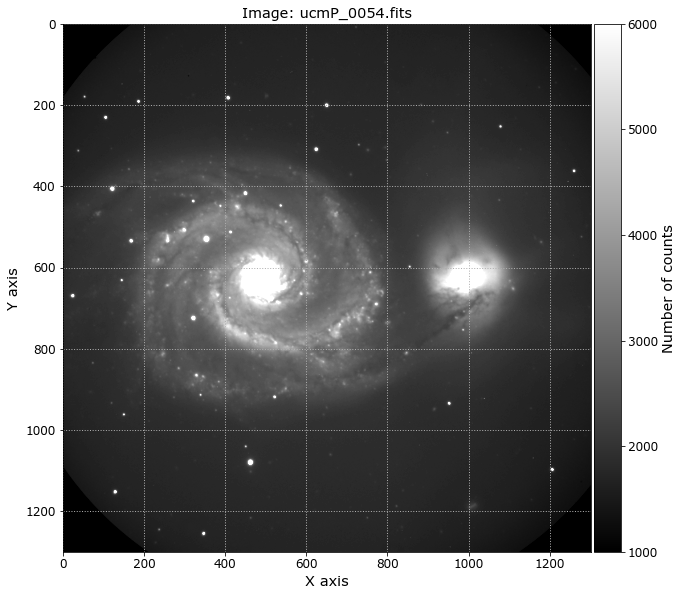

In [110]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
img = ax.imshow(image_data, cmap='gray', vmin=1000, vmax=6000)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Image: {}'.format(filename))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(img, cax=cax, label='Number of counts')
ax.grid()

If you want to use a logarithmic color scale load the ``LogNorm`` object from matplotlib.

In [111]:
from matplotlib.colors import LogNorm

Let's compare the use of ``LogNorm`` (left image) with the default linear scaling (right image).

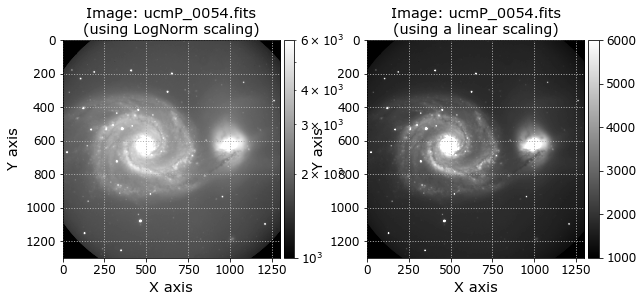

In [112]:
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
for i in range(2):
    if i == 0:
        norm = LogNorm()
        subtitle = '(using LogNorm scaling)'
    else:
        norm = None
        subtitle = '(using a linear scaling)'
    ax = axarr[i]
    img = ax.imshow(image_data, cmap='gray', vmin=1000, vmax=6000, norm=norm)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title('Image: {}\n{}'.format(filename, subtitle))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img, cax=cax)
    ax.grid()

### Differences in syntax between IRAF and Python

#### x versus y
When working with images (2-dimensional) arrays, IRAF has the index order ``[x, y]``. 
In Python’s Numpy package, the order is reversed: ``[y, x]``.

In [113]:
# auxiliary function to display a rectangle and compute mean value within it
def draw_rectangle(ax, x1, x2, y1, y2, display_mean=False):
    ax.plot((x1, x1), (y1, y2), 'y-', lw=1)
    ax.plot((x2, x2), (y1, y2), 'y-', lw=1)
    ax.plot((x1, x2), (y1, y1), 'y-', lw=1)
    ax.plot((x1, x2), (y2, y2), 'y-', lw=1)
    if display_mean:
        media = image_data[y1:y2,x1:x2].mean()
        ax.text((x1+x2)/2, y1, str(int(media)), 
                ha='center', va='bottom', color='y', fontsize=12)

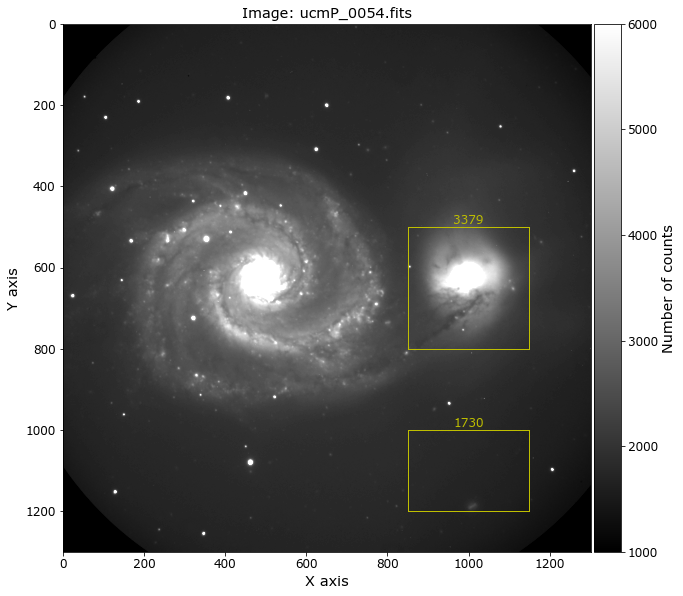

In [114]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
img = ax.imshow(image_data, cmap='gray', vmin=1000, vmax=6000)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Image: {}'.format(filename))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(img, cax=cax, label='Number of counts')

# make use of the auxiliary image previously defined
draw_rectangle(ax, 850, 1150, 1000, 1200, display_mean=True)
draw_rectangle(ax, 850, 1150, 500, 800, display_mean=True)

#### index 0

Note for IRAF users:  
IRAF indexes begin at 1 whereas Python arrays start at zero. 
So to pull out the first element of a 1-dimensional array 
you would use ``array[0]``. To pull out the lower left corner 
of a 2-dimensional array you would use ``array[0,0]``.

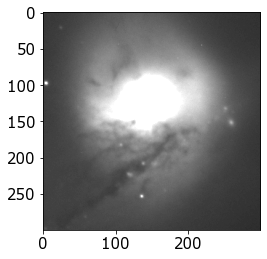

In [80]:
x1, x2, y1, y2 = 850, 1150, 500, 800
companion_galaxy = image_data[y1:y2,x1:x2]
plt.imshow(companion_galaxy, cmap='gray', vmin=1000,vmax=6000)

### Slicing

Slicing in IRAF and IDL is inclusive for the right side of the slice. 
In Python the right side of the slice is exclusive. 
For example, if you end a slice with the 4th index, ``array[0:4]``, 
the fourth index element (actually the 5th element in the array since index begins at 0) will not be included in the slice.

Let us create and plot a transversal cut along the center of the galaxies.

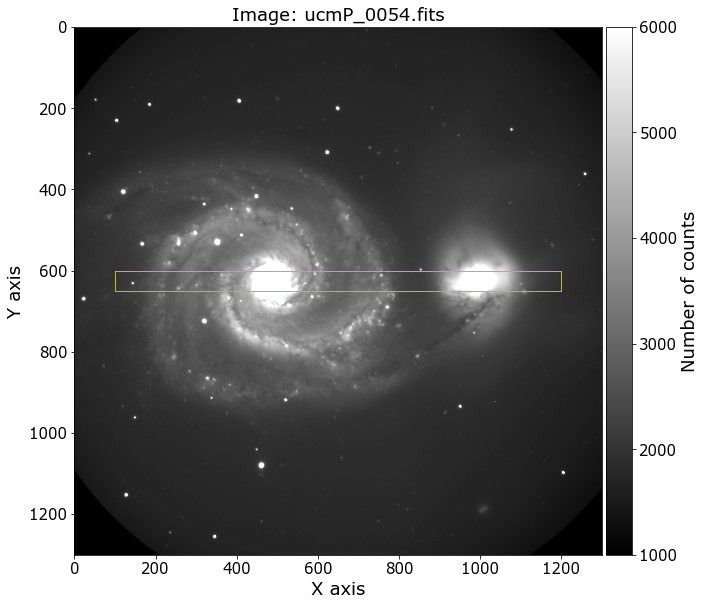

In [82]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
img = ax.imshow(image_data, cmap='gray', vmin=1000, vmax=6000)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Image: {}'.format(filename))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(img, cax=cax, label='Number of counts')

x1, x2, y1, y2 = 100,1200,600,650
draw_rectangle(ax, x1, x2, y1, y2)

In [83]:
box_1 = image_data[y1:y2,:]
print(box_1.shape)
cross_x = box_1.sum(axis=0)
print(cross_x.shape)
crosss_x = np.divide(cross_x, box_1.shape[0])

(50, 1301)
(1301,)


Text(0, 0.5, 'Number of counts')

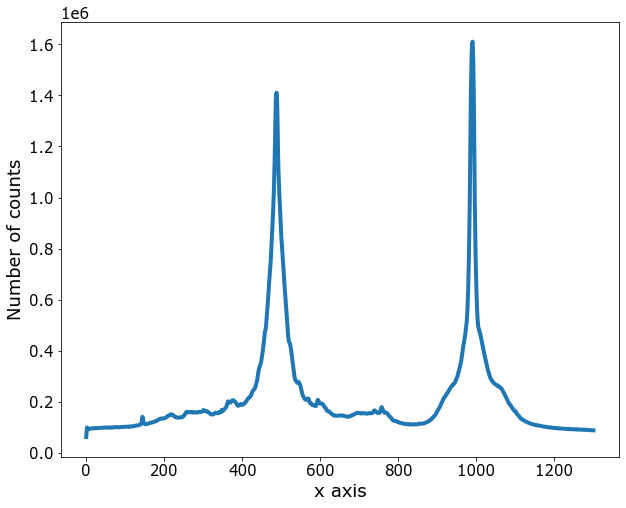

In [84]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 8))
ax.plot(cross_x)
ax.set_xlabel('x axis')
ax.set_ylabel('Number of counts')

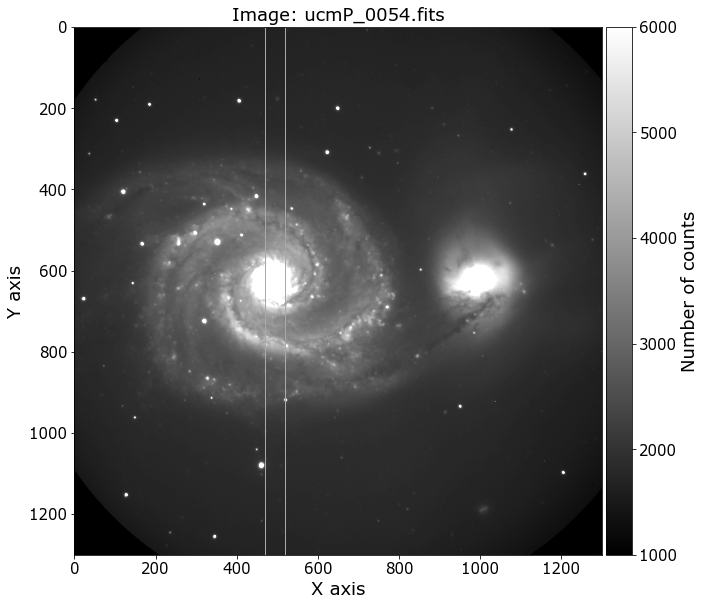

In [86]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
img = ax.imshow(image_data, cmap='gray', vmin=1000, vmax=6000)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Image: {}'.format(filename))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(img, cax=cax, label='Number of counts')

x1, x2, y1, y2 = 470, 520, 0, 1300
draw_rectangle(ax, x1, x2, y1, y2)

In [87]:
box_2 = image_data[:,x1:x2]
print(box_2.shape)
cross_y = box_2.sum(axis=1)
print(cross_y.shape)
corte_y = np.divide(cross_y,box_2.shape[0])

(1301, 50)
(1301,)


Text(0, 0.5, 'Number of counts')

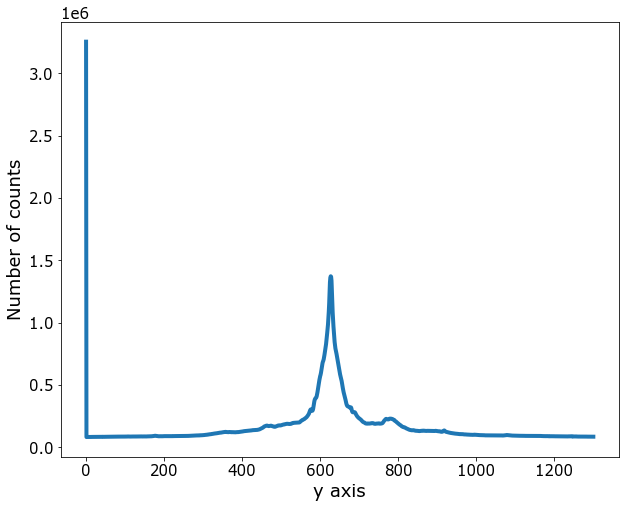

In [88]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 8))
ax.plot(cross_y)
ax.set_xlabel('y axis')
ax.set_ylabel('Number of counts')

### Matplotlib image origin

The default origin location for matplotlib plots (a common Python plotting library) will be in the upper-left. To change this to the lower left (common for images) you can use the ``origin=lower`` parameter in the ``imshow`` call as follows: ``plt.imshow(..., origin='lower')``.

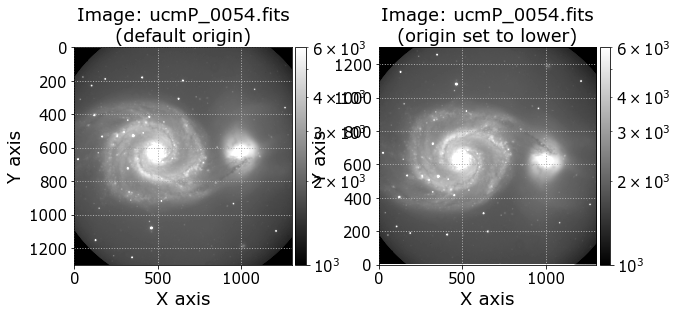

In [89]:
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
for i in range(2):
    if i == 0:
        origin = 'upper'
        subtitle = '(default origin)'
    else:
        origin = 'lower'
        subtitle = '(origin set to lower)'
    ax = axarr[i]
    img = ax.imshow(image_data, cmap='gray', vmin=1000, vmax=6000, 
                    origin=origin, norm=LogNorm())
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title('Image: {}\n{}'.format(filename, subtitle))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img, cax=cax)
    ax.grid()

As any 2-d numpy array the images can be rotated to any angle

In [90]:
from scipy.ndimage import rotate

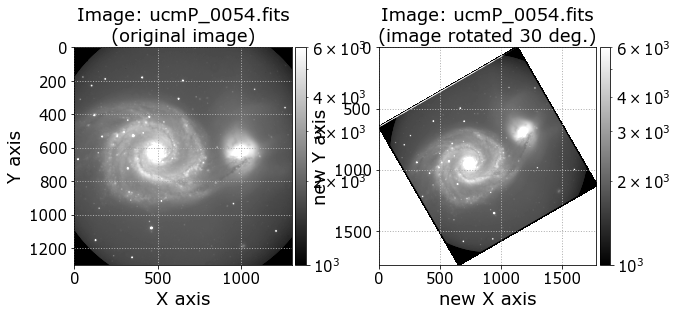

In [92]:
image_data_PA30 = rotate(image_data, 30, axes=(1,0))

fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
for i in range(2):
    ax = axarr[i]
    if i == 0:
        image = image_data
        subtitle = '(original image)'
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
    else:
        image = image_data_PA30
        subtitle = '(image rotated 30 deg.)'
        ax.set_xlabel('new X axis')
        ax.set_ylabel('new Y axis')
        
    img = ax.imshow(image, cmap='gray', vmin=1000, vmax=6000, norm=LogNorm())
    ax.set_title('Image: {}\n{}'.format(filename, subtitle))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img, cax=cax)
    ax.grid()